In [1]:
# !pip3 install pymannkendall

In [2]:
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import pandas as pd
import numpy as np
import random
import os, os.path, pickle, sys
import pymannkendall as mk

import statistics
import statsmodels.api as sm

from scipy import stats

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import geopandas

import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, Normalize
from matplotlib import cm

sys.path.append("/Users/hn/Documents/00_GitHub/Ag/rangeland/Python_Codes/")
import rangeland_core as rc

2025-05-09 12:00:19.047999: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def plot_SF(SF, ax_, cmap_ = "Pastel1", col="EW_meridian"):
    SF.plot(column=col, ax=ax_, alpha=1, cmap=cmap_, edgecolor='k', legend=False, linewidth=0.1)

In [4]:
dpi_, map_dpi_=300, 900
custom_cmap_coral = ListedColormap(['lightcoral', 'black'])
custom_cmap_BW = ListedColormap(['white', 'black'])
cmap_G = cm.get_cmap('Greens') # 'PRGn', 'YlGn'
cmap_R = cm.get_cmap('Reds') 

In [5]:
from matplotlib import colormaps
print (list(colormaps)[:4])

['magma', 'inferno', 'plasma', 'viridis']


In [26]:
research_db = "/Users/hn/Documents/01_research_data/"
common_data = research_db + "common_data/"

In [27]:
rangeland_bio_base = research_db + "/RangeLand_bio/"
rangeland_bio_data = rangeland_bio_base + "Data/"
min_bio_dir = rangeland_bio_data + "Min_Data/"

rangeland_base = "/Users/hn/Documents/01_research_data/RangeLand/Data/"
rangeland_reOrganized = rangeland_base + "reOrganized/"

bio_reOrganized = rangeland_bio_data + "reOrganized/"
os.makedirs(bio_reOrganized, exist_ok=True)

bio_plots = rangeland_bio_base + "plots/"
os.makedirs(bio_plots, exist_ok=True)

yue_plots = bio_plots + "yue/"
os.makedirs(yue_plots, exist_ok=True)

In [7]:
ANPP = pd.read_pickle(bio_reOrganized + "bpszone_ANPP_no2012.sav")
ANPP = ANPP["bpszone_ANPP"]
ANPP.head(2)

,year,fid,pixel_count,area_sqMeter,mean_lb_per_acr,groupveg
0,1984,1,451.0,28187500.0,4339.253286,Grassland
1,1985,1,458.0,28625000.0,3624.427685,Grassland


In [8]:
ANPP

,year,fid,pixel_count,area_sqMeter,mean_lb_per_acr,groupveg
0,1984,1,451.0,28187500.0,4339.253286,Grassland
1,1985,1,458.0,28625000.0,3624.427685,Grassland
2,1986,1,446.0,27875000.0,4847.357033,Grassland
3,1987,1,454.0,28375000.0,4213.969125,Grassland
4,1988,1,460.0,28750000.0,3190.516070,Grassland
...,...,...,...,...,...,...
1061290,2019,27302,1550.0,96875000.0,659.277871,Shrubland
1061291,2020,27302,1549.0,96812500.0,450.379300,Shrubland
1061292,2021,27302,1549.0,96812500.0,272.997111,Shrubland
1061293,2022,27302,1550.0,96875000.0,319.877538,Shrubland


In [9]:
2012 in sorted(ANPP.year.unique())

False

In [10]:
filename = bio_reOrganized + "ANPP_MK_Spearman_no2012.sav"
ANPP_MK_df = pd.read_pickle(filename)
ANPP_MK_df = ANPP_MK_df["ANPP_MK_df"]

print (len(ANPP_MK_df["fid"].unique()))
ANPP_MK_df.head(2)

27226


,fid,sens_slope,Tau,MK_score,trend,p,var_s,trend_yue,p_yue,var_s_yue,...,var_s_yue_lag3,trend_rao,p_rao,var_s_rao,Spearman,p_Spearman,medians_diff_ANPP,medians_diff_slope_ANPP,median_ANPP_change_as_perc,state_majority_area
0,1,11.636262,0.201080,149.0,no trend,0.073400,6833.666667,increasing,0.000458,1784.033545,...,8350.372877,no trend,0.073400,6833.666667,0.280364,0.083850,440.567246,11.296596,10.548149,South Dakota
1,2,11.345635,0.187584,139.0,no trend,0.095044,6833.666667,increasing,0.000013,1004.615712,...,10463.895688,no trend,0.095044,6833.666667,0.264170,0.104145,620.335382,15.906035,15.867695,South Dakota


In [11]:
%%time
Albers_SF_name = bio_reOrganized + "Albers_BioRangeland_Min_Ehsan" # laptop
Albers_SF = geopandas.read_file(Albers_SF_name)
Albers_SF.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)
Albers_SF.rename(columns={"minstatsid": "fid", 
                          "satae_max": "state_majority_area"}, inplace=True)

Albers_SF["centroid"] = Albers_SF["geometry"].centroid
Albers_SF.head(2)

CPU times: user 36 s, sys: 689 ms, total: 36.6 s
Wall time: 39.3 s


,hucsgree_4,value,bps_code,bps_model,bps_name,groupveg,fid,state_majority_area,state_1,state_2,geometry,centroid
0,1867,1867,14900,14900_60,Gulf and Atlantic Coastal Plain Tidal Marsh Sy...,Riparian,0,Maryland,Maryland,Maryland,"POLYGON ((1716005.440 1885659.440, 1716011.137...",POINT (1710061.446 1887226.443)
1,1670,1670,14200,14200_39_40_42,Northern Tallgrass Prairie,Grassland,1,South Dakota,South Dakota,South Dakota,"POLYGON ((-73651.375 2511589.569, -73663.850 2...",POINT (-83817.165 2508852.829)


In [12]:
%%time
## bad 2012
# f_name = bio_reOrganized + 'Albers_SF_west_ANPP_MK_Spearman.shp.zip'
f_name = bio_reOrganized + 'Albers_SF_west_ANPP_MK_Spearman_no2012.shp.zip'
SF_west = geopandas.read_file(f_name)
SF_west["centroid"] = SF_west["geometry"].centroid
SF_west.head(2)

CPU times: user 41 s, sys: 467 ms, total: 41.5 s
Wall time: 42.8 s


,hucsgree_4,bps_code,bps_model,bps_name,groupveg,fid,state_majo,state_1,state_2,EW_meridia,...,trend_rao,p_rao,Tau,Spearman,p_Spearman,medians_di,medians__1,median_ANP,geometry,centroid
0,1670,14200,14200_39_40_42,Northern Tallgrass Prairie,Grassland,1,South Dakota,South Dakota,South Dakota,W,...,no trend,0.073400,0.201080,0.280364,0.083850,440.567246,11.296596,10.548149,"POLYGON ((-73651.375 2511589.569, -73663.850 2...",POINT (-83817.165 2508852.829)
1,1670,14200,14200_39_40_42,Northern Tallgrass Prairie,Grassland,2,South Dakota,South Dakota,South Dakota,W,...,no trend,0.095044,0.187584,0.264170,0.104145,620.335382,15.906035,15.867695,"POLYGON ((-60331.340 2485470.566, -60440.412 2...",POINT (-73023.283 2480823.016)


In [13]:
groupveg = sorted(SF_west["groupveg"].unique())

veg_colors = {"Barren-Rock/Sand/Clay" : "blue",
              "Conifer" : "green",
              "Grassland" : "red",
              "Hardwood" : "cyan",
              "Riparian" : "magenta",
              "Shrubland" : "yellow",
              "Sparse" : "black"}

for a_veg in  groupveg:
    SF_west.loc[SF_west['groupveg'] == a_veg, 'color'] = veg_colors[a_veg]
    Albers_SF.loc[Albers_SF['groupveg'] == a_veg, 'color'] = veg_colors[a_veg]

SF_west.head(2)

,hucsgree_4,bps_code,bps_model,bps_name,groupveg,fid,state_majo,state_1,state_2,EW_meridia,...,p_rao,Tau,Spearman,p_Spearman,medians_di,medians__1,median_ANP,geometry,centroid,color
0,1670,14200,14200_39_40_42,Northern Tallgrass Prairie,Grassland,1,South Dakota,South Dakota,South Dakota,W,...,0.073400,0.201080,0.280364,0.083850,440.567246,11.296596,10.548149,"POLYGON ((-73651.375 2511589.569, -73663.850 2...",POINT (-83817.165 2508852.829),red
1,1670,14200,14200_39_40_42,Northern Tallgrass Prairie,Grassland,2,South Dakota,South Dakota,South Dakota,W,...,0.095044,0.187584,0.264170,0.104145,620.335382,15.906035,15.867695,"POLYGON ((-60331.340 2485470.566, -60440.412 2...",POINT (-73023.283 2480823.016),red


In [14]:
SF_west[["fid", "trend_yue"]].groupby("trend_yue").count()

,fid
trend_yue,
decreasing,90
increasing,25187
no trend,1949


In [15]:
sorted(SF_west['state_1'].unique())

['Arizona',
 'California',
 'Colorado',
 'Idaho',
 'Iowa',
 'Kansas',
 'Minnesota',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Mexico',
 'North Dakota',
 'Oklahoma',
 'Oregon',
 'South Dakota',
 'Texas',
 'Utah',
 'Washington',
 'Wyoming']

In [16]:
SF_west.rename(columns={"EW_meridia": "EW_meridian",
                        "p_valueSpe" : "p_valueSpearman",
                        "medians_di": "medians_diff_ANPP",
                        "medians__1" : "medians_diff_slope_ANPP",
                        "median_ANP" : "median_ANPP_change_as_perc",
                        "state_majo" : "state_majority_area"}, 
                      inplace=True)

## Greening Yue but not Original

In [17]:
SF_west.columns

Index(['hucsgree_4', 'bps_code', 'bps_model', 'bps_name', 'groupveg', 'fid',
       'state_majority_area', 'state_1', 'state_2', 'EW_meridian',
       'sens_slope', 'trend', 'trend_yue', 'p_yue', 'trend_rao', 'p_rao',
       'Tau', 'Spearman', 'p_Spearman', 'medians_diff_ANPP',
       'medians_diff_slope_ANPP', 'median_ANPP_change_as_perc', 'geometry',
       'centroid', 'color'],
      dtype='object')

In [18]:
greening_yue_df = ANPP_MK_df[ANPP_MK_df["trend_yue"] == "increasing"].copy()
greening_yue_df = greening_yue_df[["fid", "trend_yue"]]

greening_original_df = ANPP_MK_df[ANPP_MK_df["trend"] == "increasing"].copy()
greening_original_df = greening_original_df[["fid", "trend"]]

In [19]:
greening_yue_FIDs = list(greening_yue_df["fid"].unique())
greening_original_FIDs = list(greening_original_df["fid"].unique())

In [20]:
intersection_yue_orig_FIDs = list(set(greening_yue_FIDs).intersection(set(greening_original_FIDs)))
len(intersection_yue_orig_FIDs)

21363

In [21]:
# s.difference(t)
green_Yue_notoriginal_FIDs = set(greening_yue_FIDs) - set(greening_original_FIDs)
green_original_notYue_FIDs = set(greening_original_FIDs) - set(greening_yue_FIDs)

In [22]:
print (f"{len(green_original_notYue_FIDs) = }")
print (f"{len(green_Yue_notoriginal_FIDs) = }")

len(green_original_notYue_FIDs) = 3
len(green_Yue_notoriginal_FIDs) = 3824


In [23]:
YueGreen_notOrig_df = ANPP_MK_df[ANPP_MK_df["fid"].isin(list(green_Yue_notoriginal_FIDs))].copy()
OrigGreen_notYue_df = ANPP_MK_df[ANPP_MK_df["fid"].isin(list(green_original_notYue_FIDs))].copy()
Yue_orig_inter_green_df = ANPP_MK_df[ANPP_MK_df["fid"].isin(list(intersection_yue_orig_FIDs))].copy()

In [24]:
## Check if our set operations are correct!
union_set = green_original_notYue_FIDs.union(green_Yue_notoriginal_FIDs).union(intersection_yue_orig_FIDs)
len(union_set) == len(YueGreen_notOrig_df) + len(OrigGreen_notYue_df) + len(Yue_orig_inter_green_df)

True

# Make some plots

In [28]:
county_fips_dict = pd.read_pickle(common_data + "county_fips.sav")

county_fips = county_fips_dict["county_fips"]
full_2_abb = county_fips_dict["full_2_abb"]
abb_2_full_dict = county_fips_dict["abb_2_full_dict"]
abb_full_df = county_fips_dict["abb_full_df"]
filtered_counties_29States = county_fips_dict["filtered_counties_29States"]
SoI = county_fips_dict["SoI"]
state_fips = county_fips_dict["state_fips"]

state_fips = state_fips[state_fips.state != "VI"].copy()
state_fips.head(2)

,state,state_fips,EW_meridian,state_full
0,AK,02,W,Alaska
1,AL,01,E,Alabama


In [32]:
from shapely.geometry import Polygon
gdf = geopandas.read_file(common_data +'cb_2018_us_state_500k.zip')
# gdf = geopandas.read_file(common_data +'cb_2018_us_state_500k')

gdf.rename(columns={"STUSPS": "state"}, inplace=True)
gdf = gdf[~gdf.state.isin(["PR", "VI", "AS", "GU", "MP"])]
gdf = pd.merge(gdf, state_fips[["EW_meridian", "state"]], how="left", on="state")

In [33]:
visframe = gdf.to_crs({'init':'epsg:5070'})
visframe_mainLand = visframe[~visframe.state.isin(["AK", "HI"])].copy()

visframe_mainLand_west = visframe[visframe.EW_meridian.isin(["W"])].copy()
visframe_mainLand_west = visframe_mainLand_west[~visframe_mainLand_west.state.isin(["AK", "HI"])].copy()

In [34]:
ANPP.head(2)

,year,fid,pixel_count,area_sqMeter,mean_lb_per_acr,groupveg
0,1984,1,451.0,28187500.0,4339.253286,Grassland
1,1985,1,458.0,28625000.0,3624.427685,Grassland


In [35]:
sorted(ANPP.year.unique())

[1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

### Plot a couple of examples

In [36]:
ANPP_west = ANPP.copy()
ANPP_west.head(2)

,year,fid,pixel_count,area_sqMeter,mean_lb_per_acr,groupveg
0,1984,1,451.0,28187500.0,4339.253286,Grassland
1,1985,1,458.0,28625000.0,3624.427685,Grassland


In [37]:
cols_ = ["fid", "state_majority_area", "state_1", "state_2", "EW_meridian"]
ANPP_west = pd.merge(ANPP_west, SF_west[cols_], how="left", on = "fid")
ANPP_west.head(2)

,year,fid,pixel_count,area_sqMeter,mean_lb_per_acr,groupveg,state_majority_area,state_1,state_2,EW_meridian
0,1984,1,451.0,28187500.0,4339.253286,Grassland,South Dakota,South Dakota,South Dakota,W
1,1985,1,458.0,28625000.0,3624.427685,Grassland,South Dakota,South Dakota,South Dakota,W


In [38]:
ANPP_west["EW_meridian"].unique()

array(['W'], dtype=object)

In [39]:
mystery_FID_wNoState_in_SF = ANPP_west[ANPP_west["EW_meridian"] != "W"]["fid"].unique()
mystery_FID_wNoState_in_SF

array([], dtype=int64)

In [40]:
ANPP_west.head(2)

,year,fid,pixel_count,area_sqMeter,mean_lb_per_acr,groupveg,state_majority_area,state_1,state_2,EW_meridian
0,1984,1,451.0,28187500.0,4339.253286,Grassland,South Dakota,South Dakota,South Dakota,W
1,1985,1,458.0,28625000.0,3624.427685,Grassland,South Dakota,South Dakota,South Dakota,W


In [41]:
SF_west_Yue_notOrig = SF_west[SF_west["fid"].isin(green_Yue_notoriginal_FIDs)].copy()
SF_west_Orig_notYue = SF_west[SF_west["fid"].isin(green_original_notYue_FIDs)].copy()

In [42]:
from matplotlib.lines import Line2D

In [43]:
tick_legend_FontSize = 2
params = {"font.family": "Palatino",
          "legend.fontsize": tick_legend_FontSize * 1,
          "axes.labelsize": tick_legend_FontSize * 1.2,
          "axes.titlesize": tick_legend_FontSize * 2,
          "xtick.labelsize": tick_legend_FontSize * 1.1,
          "ytick.labelsize": tick_legend_FontSize * 1.1,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "ytick.left": True,
          "xtick.labelbottom": True,
          "ytick.labelleft": True,
         'axes.linewidth' : .05}

plt.rcParams.update(params)

In [44]:
Albers_SF.head(2)

,hucsgree_4,value,bps_code,bps_model,bps_name,groupveg,fid,state_majority_area,state_1,state_2,geometry,centroid,color
0,1867,1867,14900,14900_60,Gulf and Atlantic Coastal Plain Tidal Marsh Sy...,Riparian,0,Maryland,Maryland,Maryland,"POLYGON ((1716005.440 1885659.440, 1716011.137...",POINT (1710061.446 1887226.443),magenta
1,1670,1670,14200,14200_39_40_42,Northern Tallgrass Prairie,Grassland,1,South Dakota,South Dakota,South Dakota,"POLYGON ((-73651.375 2511589.569, -73663.850 2...",POINT (-83817.165 2508852.829),red


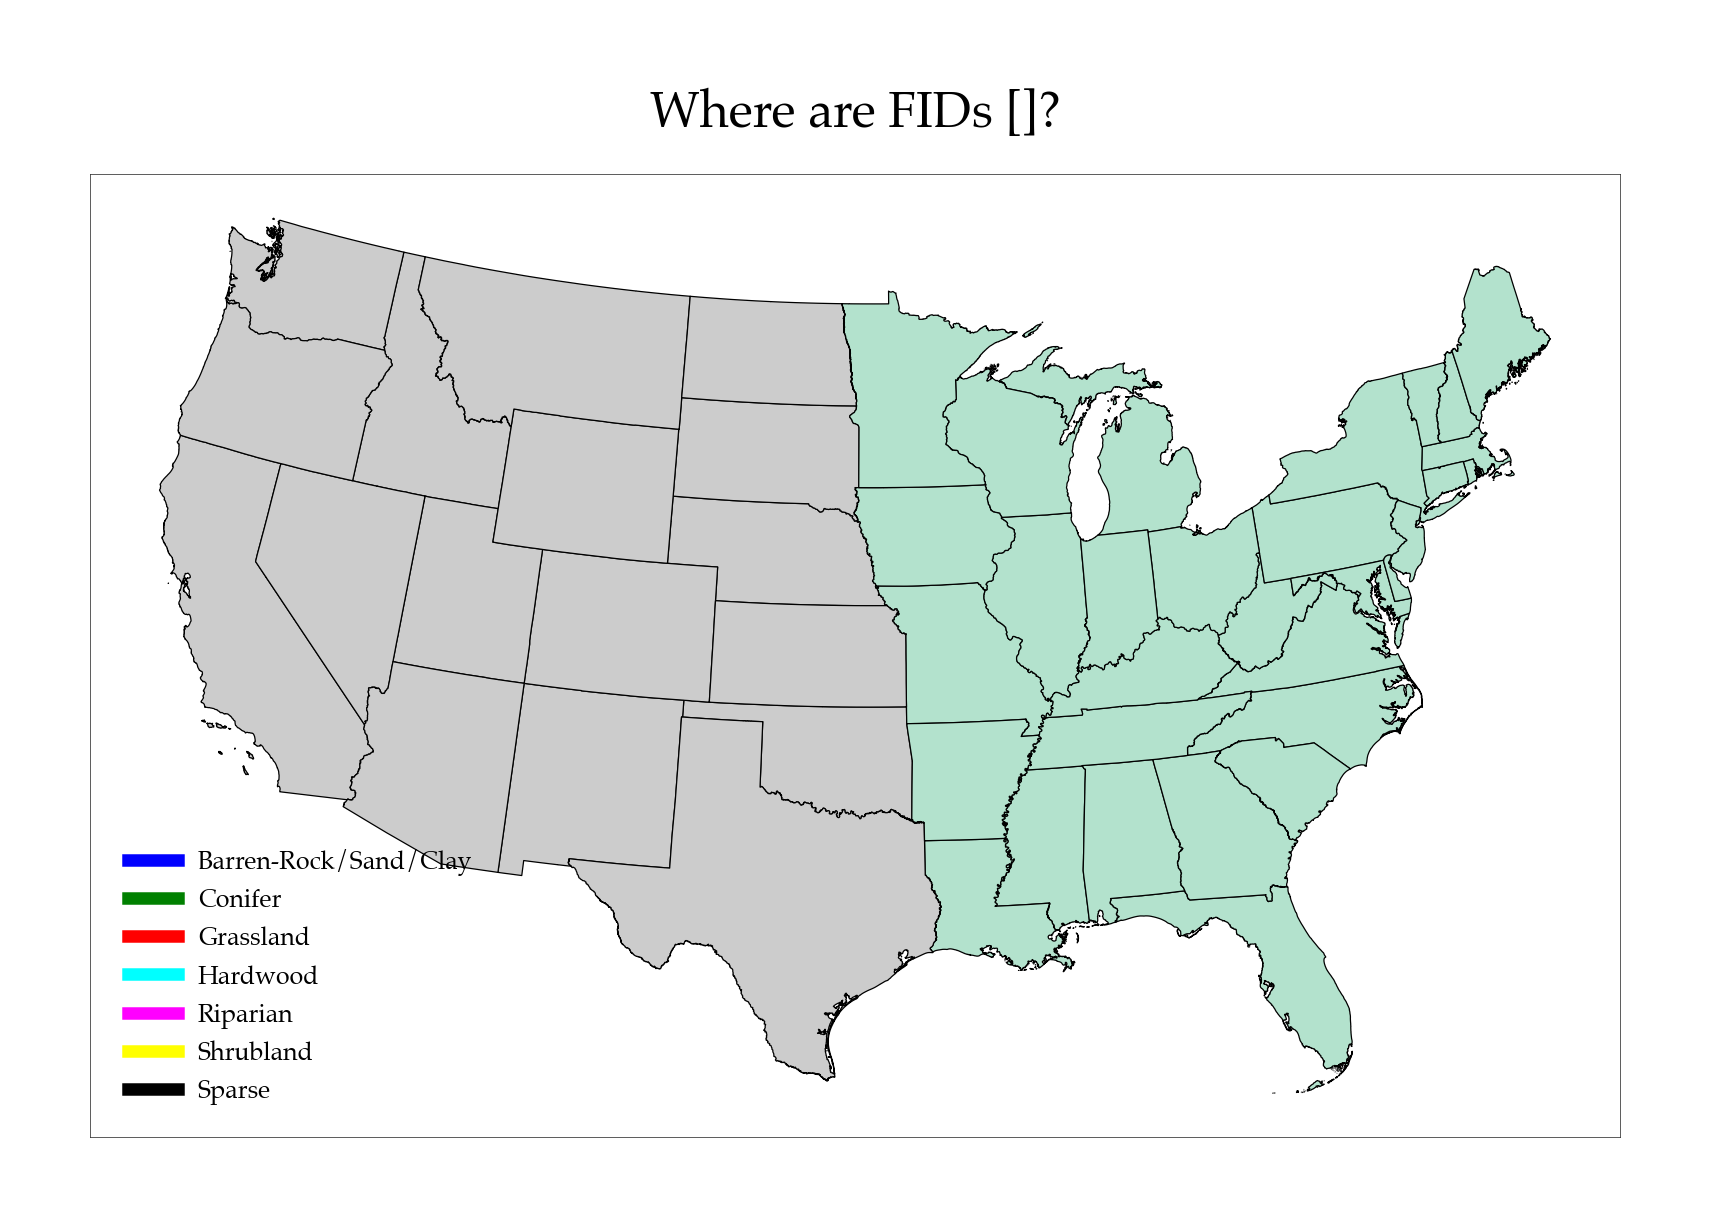

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2), dpi=map_dpi_)
ax.set_xticks([]); ax.set_yticks([])
plt.title('Where are FIDs {}?'.format(list(mystery_FID_wNoState_in_SF)), y=.92)

plot_SF(SF=visframe_mainLand, ax_=ax, col="EW_meridian", cmap_ = "Pastel2")

mystery_SF = Albers_SF[Albers_SF["fid"].isin(list(mystery_FID_wNoState_in_SF))]
mystery_SF["geometry"].centroid.plot(ax=ax, markersize=.5)

# plt.rcParams['axes.linewidth'] = .05
plt.tight_layout()
# plt.legend(fontsize=3) # ax.axis('off')
# plt.show();

labels = list(veg_colors.keys())
colors = list(veg_colors.values())
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='-') for c in colors]
plt.legend(lines, labels, frameon=False, loc="lower left", bbox_to_anchor=(0.01, 0.01))

file_name = yue_plots + "Albers_locs_vegType.png"
# plt.savefig(file_name, bbox_inches='tight', dpi=map_dpi_)

In [46]:
count_per_veg_df = SF_west_Yue_notOrig[["groupveg", "fid"]].groupby("groupveg").count().reset_index()
count_per_veg_df

,groupveg,fid
0,Barren-Rock/Sand/Clay,23
1,Conifer,61
2,Grassland,1725
3,Hardwood,125
4,Riparian,7
5,Shrubland,1877
6,Sparse,6


In [47]:
veg_colors_for_label = veg_colors.copy()
for a_key in veg_colors.keys():
    count_ = str(count_per_veg_df.loc[count_per_veg_df["groupveg"] == a_key]["fid"].item())
    new_key = a_key + " (" + count_ + ")"
    veg_colors_for_label[new_key] = veg_colors_for_label[a_key]
    del (veg_colors_for_label[a_key])
    
veg_colors_for_label

{'Barren-Rock/Sand/Clay (23)': 'blue',
 'Conifer (61)': 'green',
 'Grassland (1725)': 'red',
 'Hardwood (125)': 'cyan',
 'Riparian (7)': 'magenta',
 'Shrubland (1877)': 'yellow',
 'Sparse (6)': 'black'}

In [48]:
tick_legend_FontSize = 4
params = {"font.family": "Palatino",
          "legend.fontsize": tick_legend_FontSize * 1.5,
          "axes.labelsize": tick_legend_FontSize * 1.2,
          "axes.titlesize": tick_legend_FontSize * 2,
          "xtick.labelsize": tick_legend_FontSize * 1.1,
          "ytick.labelsize": tick_legend_FontSize * 1.1,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "ytick.left": True,
          "xtick.labelbottom": True,
          "ytick.labelleft": True,
#          'axes.linewidth' : .05
         }

plt.rcParams.update(params)

In [49]:
SF_west_Yue_notOrig["trend_yue"].unique()

array(['increasing'], dtype=object)

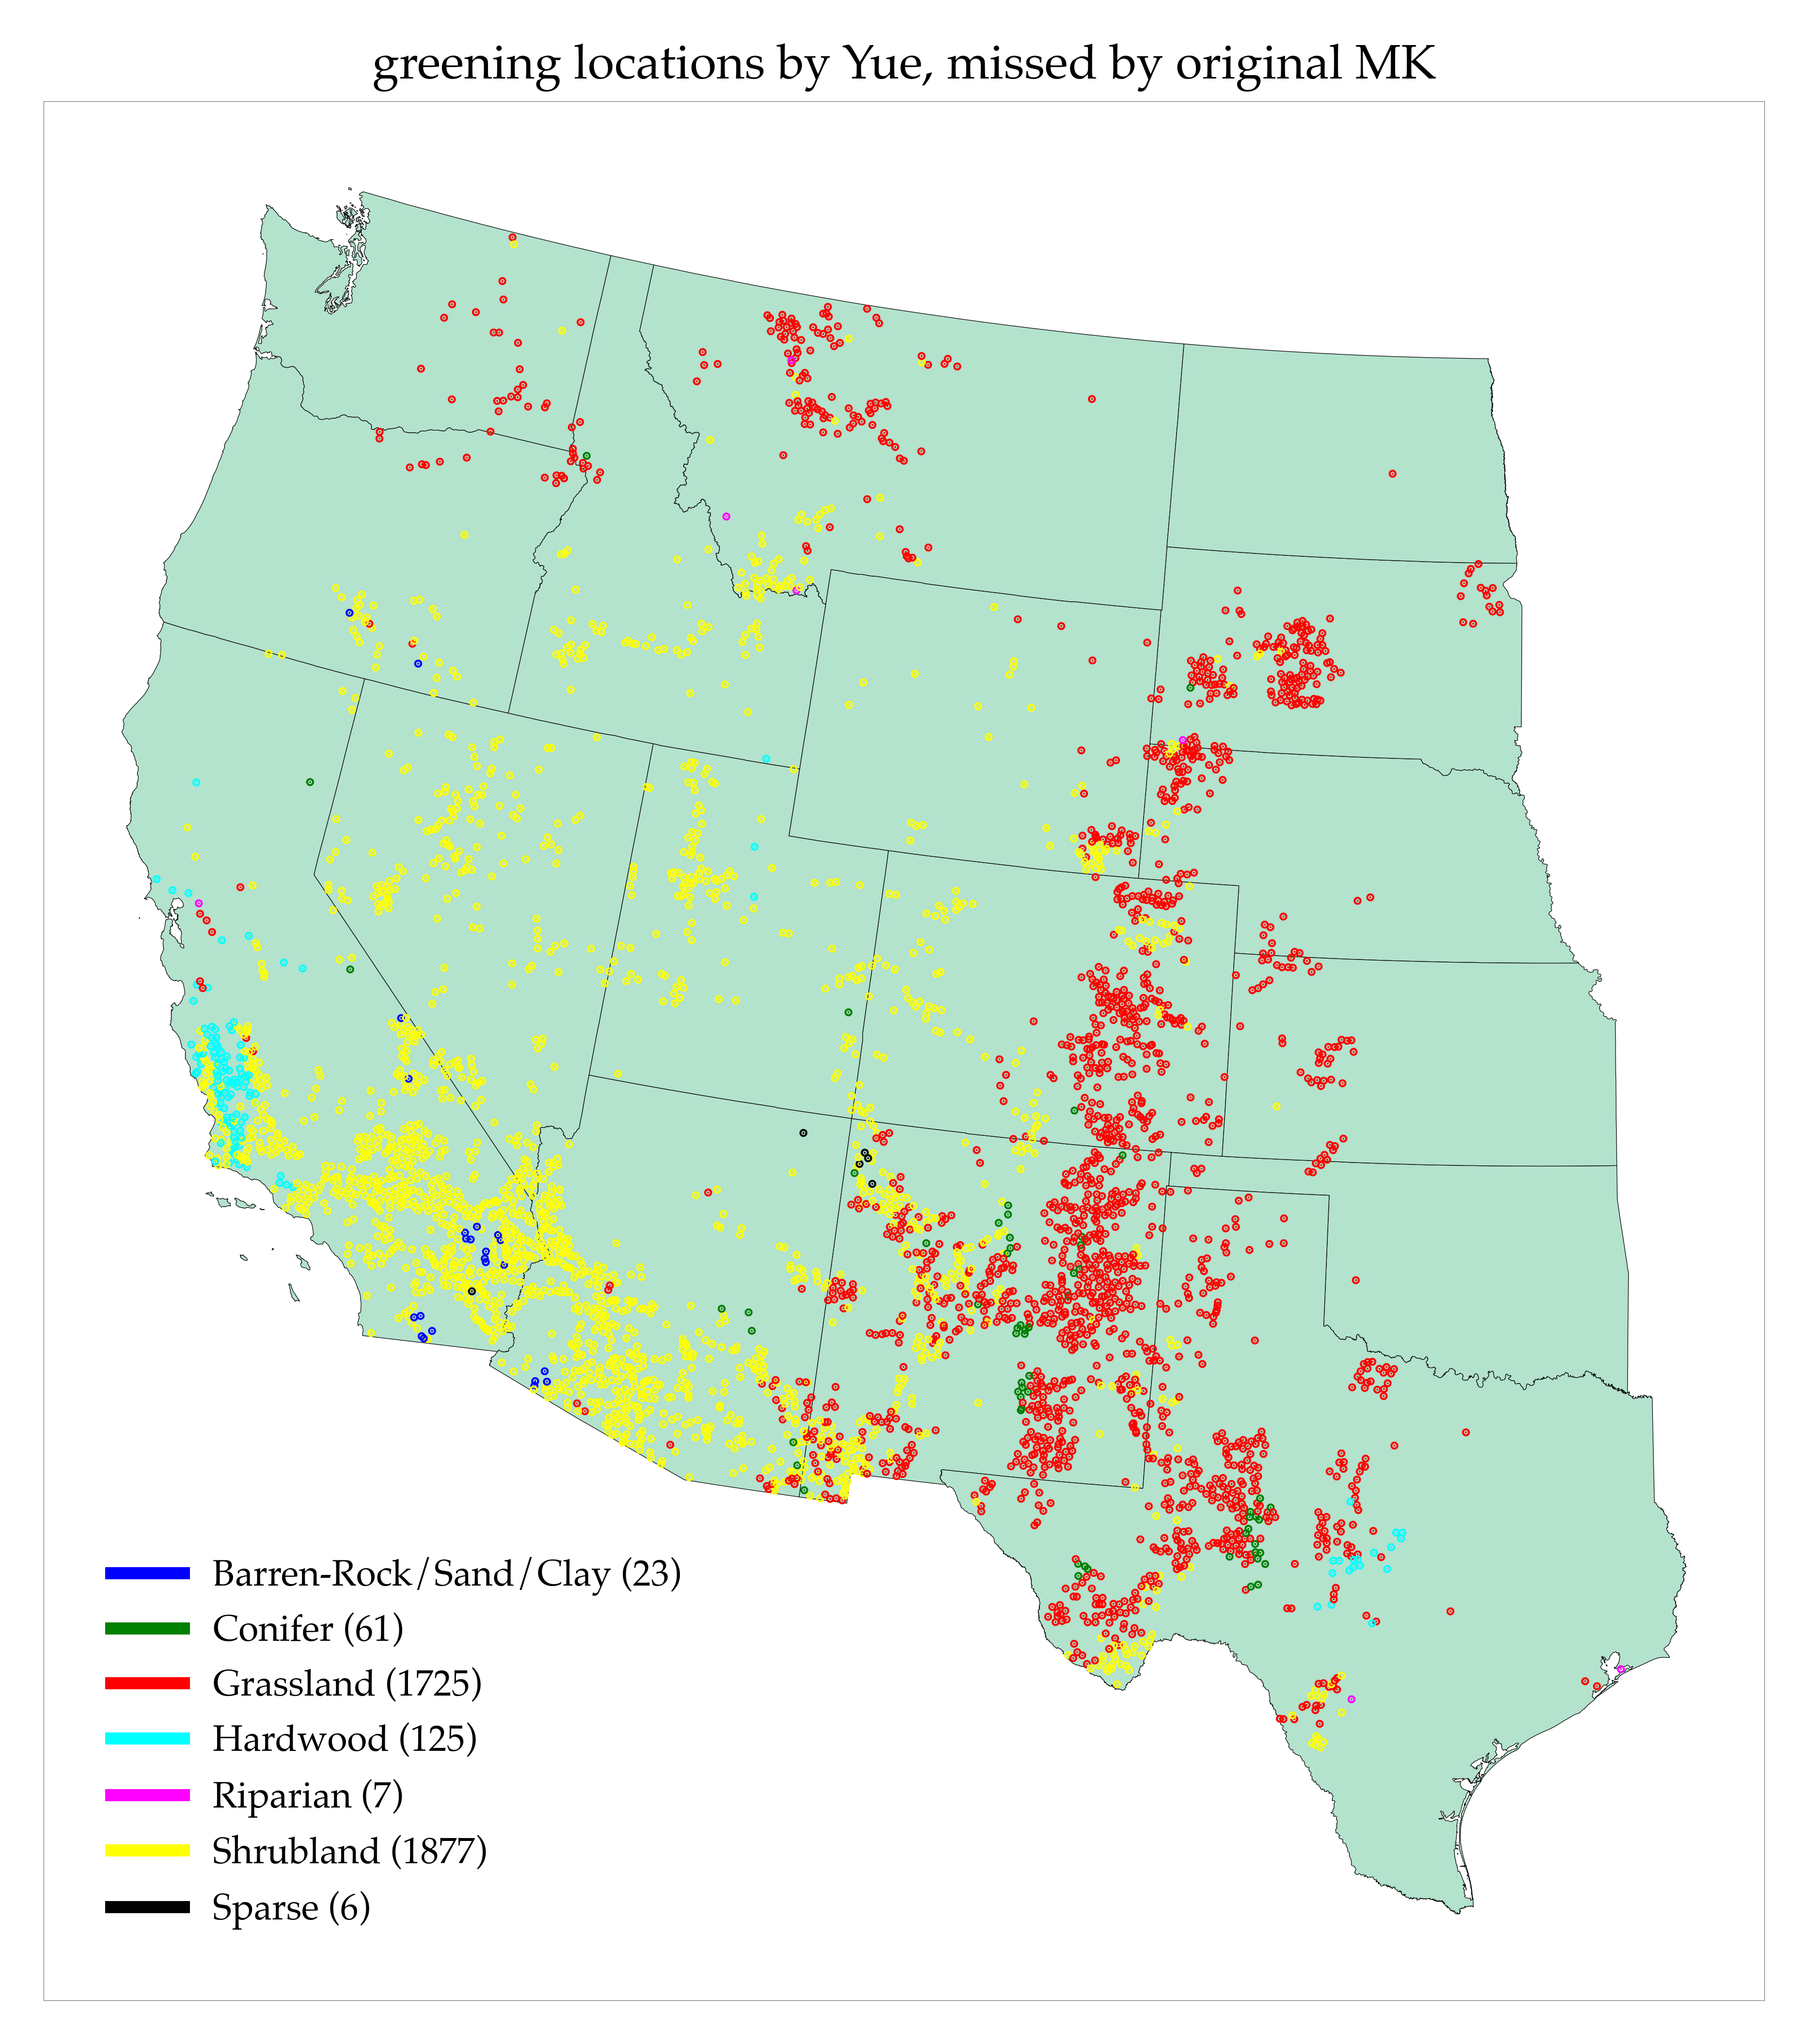

In [50]:
# SF_west.plot(column='EW_meridian', categorical=True, legend=True);
##########################################################################################

fig, ax = plt.subplots(1, 1, dpi=map_dpi_) # figsize=(2, 2)
ax.set_xticks([]); ax.set_yticks([])
plt.title('greening locations by Yue, missed by original MK', y=0.98)

plot_SF(SF=visframe_mainLand_west, ax_=ax, col="EW_meridian", cmap_ = "Pastel2")
dots_DF = SF_west_Yue_notOrig.copy()
dots_DF["geometry"].centroid.plot(ax=ax, c=dots_DF['color'], markersize=.1)

# plt.rcParams['axes.linewidth'] = .05
plt.tight_layout()
# plt.legend(fontsize=3) # ax.axis('off')
# plt.show();

labels = list(veg_colors_for_label.keys())
colors = list(veg_colors_for_label.values())
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='-') for c in colors]
plt.legend(lines, labels, frameon=False, loc="lower left", bbox_to_anchor=(0.02, 0.02))

file_name = yue_plots + "greenYue_missedOriginal.png"
# plt.savefig(file_name, bbox_inches='tight', dpi=map_dpi_)
del(dots_DF)

In [51]:
SF_west_Yue_notOrig.head(2)

,hucsgree_4,bps_code,bps_model,bps_name,groupveg,fid,state_majority_area,state_1,state_2,EW_meridian,...,p_rao,Tau,Spearman,p_Spearman,medians_diff_ANPP,medians_diff_slope_ANPP,median_ANPP_change_as_perc,geometry,centroid,color
0,1670,14200,14200_39_40_42,Northern Tallgrass Prairie,Grassland,1,South Dakota,South Dakota,South Dakota,W,...,0.073400,0.201080,0.280364,0.083850,440.567246,11.296596,10.548149,"POLYGON ((-73651.375 2511589.569, -73663.850 2...",POINT (-83817.165 2508852.829),red
1,1670,14200,14200_39_40_42,Northern Tallgrass Prairie,Grassland,2,South Dakota,South Dakota,South Dakota,W,...,0.095044,0.187584,0.264170,0.104145,620.335382,15.906035,15.867695,"POLYGON ((-60331.340 2485470.566, -60440.412 2...",POINT (-73023.283 2480823.016),red


In [52]:
SF_west_Yue_notOrig.describe()

,hucsgree_4,bps_code,fid,sens_slope,p_yue,p_rao,Tau,Spearman,p_Spearman,medians_diff_ANPP,medians_diff_slope_ANPP,median_ANPP_change_as_perc
count,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3790.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000,3824.000000
mean,1144.461559,11204.630492,15643.023274,6.502886,0.006047,0.140019,0.172250,0.256699,0.135616,254.105645,6.515529,27.101592
std,488.921134,1131.947283,7595.093847,5.425465,0.010842,0.100074,0.034747,0.053892,0.095791,254.895289,6.535777,19.267255
min,31.000000,31.000000,1.000000,0.538659,0.000000,0.000000,0.058030,0.081377,0.012200,-48.999845,-1.256406,-18.272096
25%,642.000000,10870.000000,9490.000000,2.668449,0.000013,0.064017,0.149798,0.220395,0.065032,80.586159,2.066312,15.350385
50%,1208.500000,11210.000000,14866.500000,4.400823,0.000514,0.115619,0.176788,0.264271,0.104145,162.255737,4.160404,23.171612
75%,1428.000000,11470.000000,21101.250000,8.580915,0.006411,0.199725,0.201080,0.298431,0.178195,346.696208,8.889646,34.303847
max,2718.000000,15041.000000,27302.000000,37.822081,0.049995,0.590888,0.219973,0.397571,0.622380,1736.363932,44.522152,279.991049


In [53]:
min_idx = SF_west_Yue_notOrig["sens_slope"].idxmin()
cc = ["sens_slope", "Tau", "Spearman", "medians_diff_ANPP", "median_ANPP_change_as_perc"]
SF_west_Yue_notOrig.loc[min_idx, cc]

sens_slope                     0.538659
Tau                             0.17139
Spearman                       0.275506
medians_diff_ANPP             18.739957
median_ANPP_change_as_perc    43.686441
Name: 27185, dtype: object

In [54]:
min_idx = SF_west_Yue_notOrig["Tau"].idxmin()
cc = ["sens_slope", "Tau", "Spearman", "medians_diff_ANPP", "median_ANPP_change_as_perc"]
SF_west_Yue_notOrig.loc[min_idx, cc]

sens_slope                    0.858678
Tau                            0.05803
Spearman                      0.098583
medians_diff_ANPP             24.26477
median_ANPP_change_as_perc     6.66829
Name: 26806, dtype: object

In [55]:
SF_west.head(2)

,hucsgree_4,bps_code,bps_model,bps_name,groupveg,fid,state_majority_area,state_1,state_2,EW_meridian,...,p_rao,Tau,Spearman,p_Spearman,medians_diff_ANPP,medians_diff_slope_ANPP,median_ANPP_change_as_perc,geometry,centroid,color
0,1670,14200,14200_39_40_42,Northern Tallgrass Prairie,Grassland,1,South Dakota,South Dakota,South Dakota,W,...,0.073400,0.201080,0.280364,0.083850,440.567246,11.296596,10.548149,"POLYGON ((-73651.375 2511589.569, -73663.850 2...",POINT (-83817.165 2508852.829),red
1,1670,14200,14200_39_40_42,Northern Tallgrass Prairie,Grassland,2,South Dakota,South Dakota,South Dakota,W,...,0.095044,0.187584,0.264170,0.104145,620.335382,15.906035,15.867695,"POLYGON ((-60331.340 2485470.566, -60440.412 2...",POINT (-73023.283 2480823.016),red


In [56]:
ANPP_MK_df.head(2)

,fid,sens_slope,Tau,MK_score,trend,p,var_s,trend_yue,p_yue,var_s_yue,...,var_s_yue_lag3,trend_rao,p_rao,var_s_rao,Spearman,p_Spearman,medians_diff_ANPP,medians_diff_slope_ANPP,median_ANPP_change_as_perc,state_majority_area
0,1,11.636262,0.201080,149.0,no trend,0.073400,6833.666667,increasing,0.000458,1784.033545,...,8350.372877,no trend,0.073400,6833.666667,0.280364,0.083850,440.567246,11.296596,10.548149,South Dakota
1,2,11.345635,0.187584,139.0,no trend,0.095044,6833.666667,increasing,0.000013,1004.615712,...,10463.895688,no trend,0.095044,6833.666667,0.264170,0.104145,620.335382,15.906035,15.867695,South Dakota


In [57]:
ANPP_west.head(2)

,year,fid,pixel_count,area_sqMeter,mean_lb_per_acr,groupveg,state_majority_area,state_1,state_2,EW_meridian
0,1984,1,451.0,28187500.0,4339.253286,Grassland,South Dakota,South Dakota,South Dakota,W
1,1985,1,458.0,28625000.0,3624.427685,Grassland,South Dakota,South Dakota,South Dakota,W


## Set up ticks for grid lines

In [58]:
tick_legend_FontSize = 12
params = {"font.family": "Palatino",
          "legend.fontsize": tick_legend_FontSize * 1.5,
          "axes.labelsize": tick_legend_FontSize * 1.2,
          "axes.titlesize": tick_legend_FontSize * 1.5,
          "xtick.labelsize": tick_legend_FontSize * 1.1,
          "ytick.labelsize": tick_legend_FontSize * 1.1,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "ytick.left": True,
          "xtick.labelbottom": True,
          "ytick.labelleft": True,
#          'axes.linewidth' : .05
         }

plt.rcParams.update(params)

In [59]:
# Major ticks every 5, minor ticks every 1
major_ticks = np.arange(1984, 2024, 5)
minor_ticks = np.arange(1984, 2024, 1)
y_var = "mean_lb_per_acr"

### Plot the FID with minimum and maximum of median_ANPP_change_as_perc

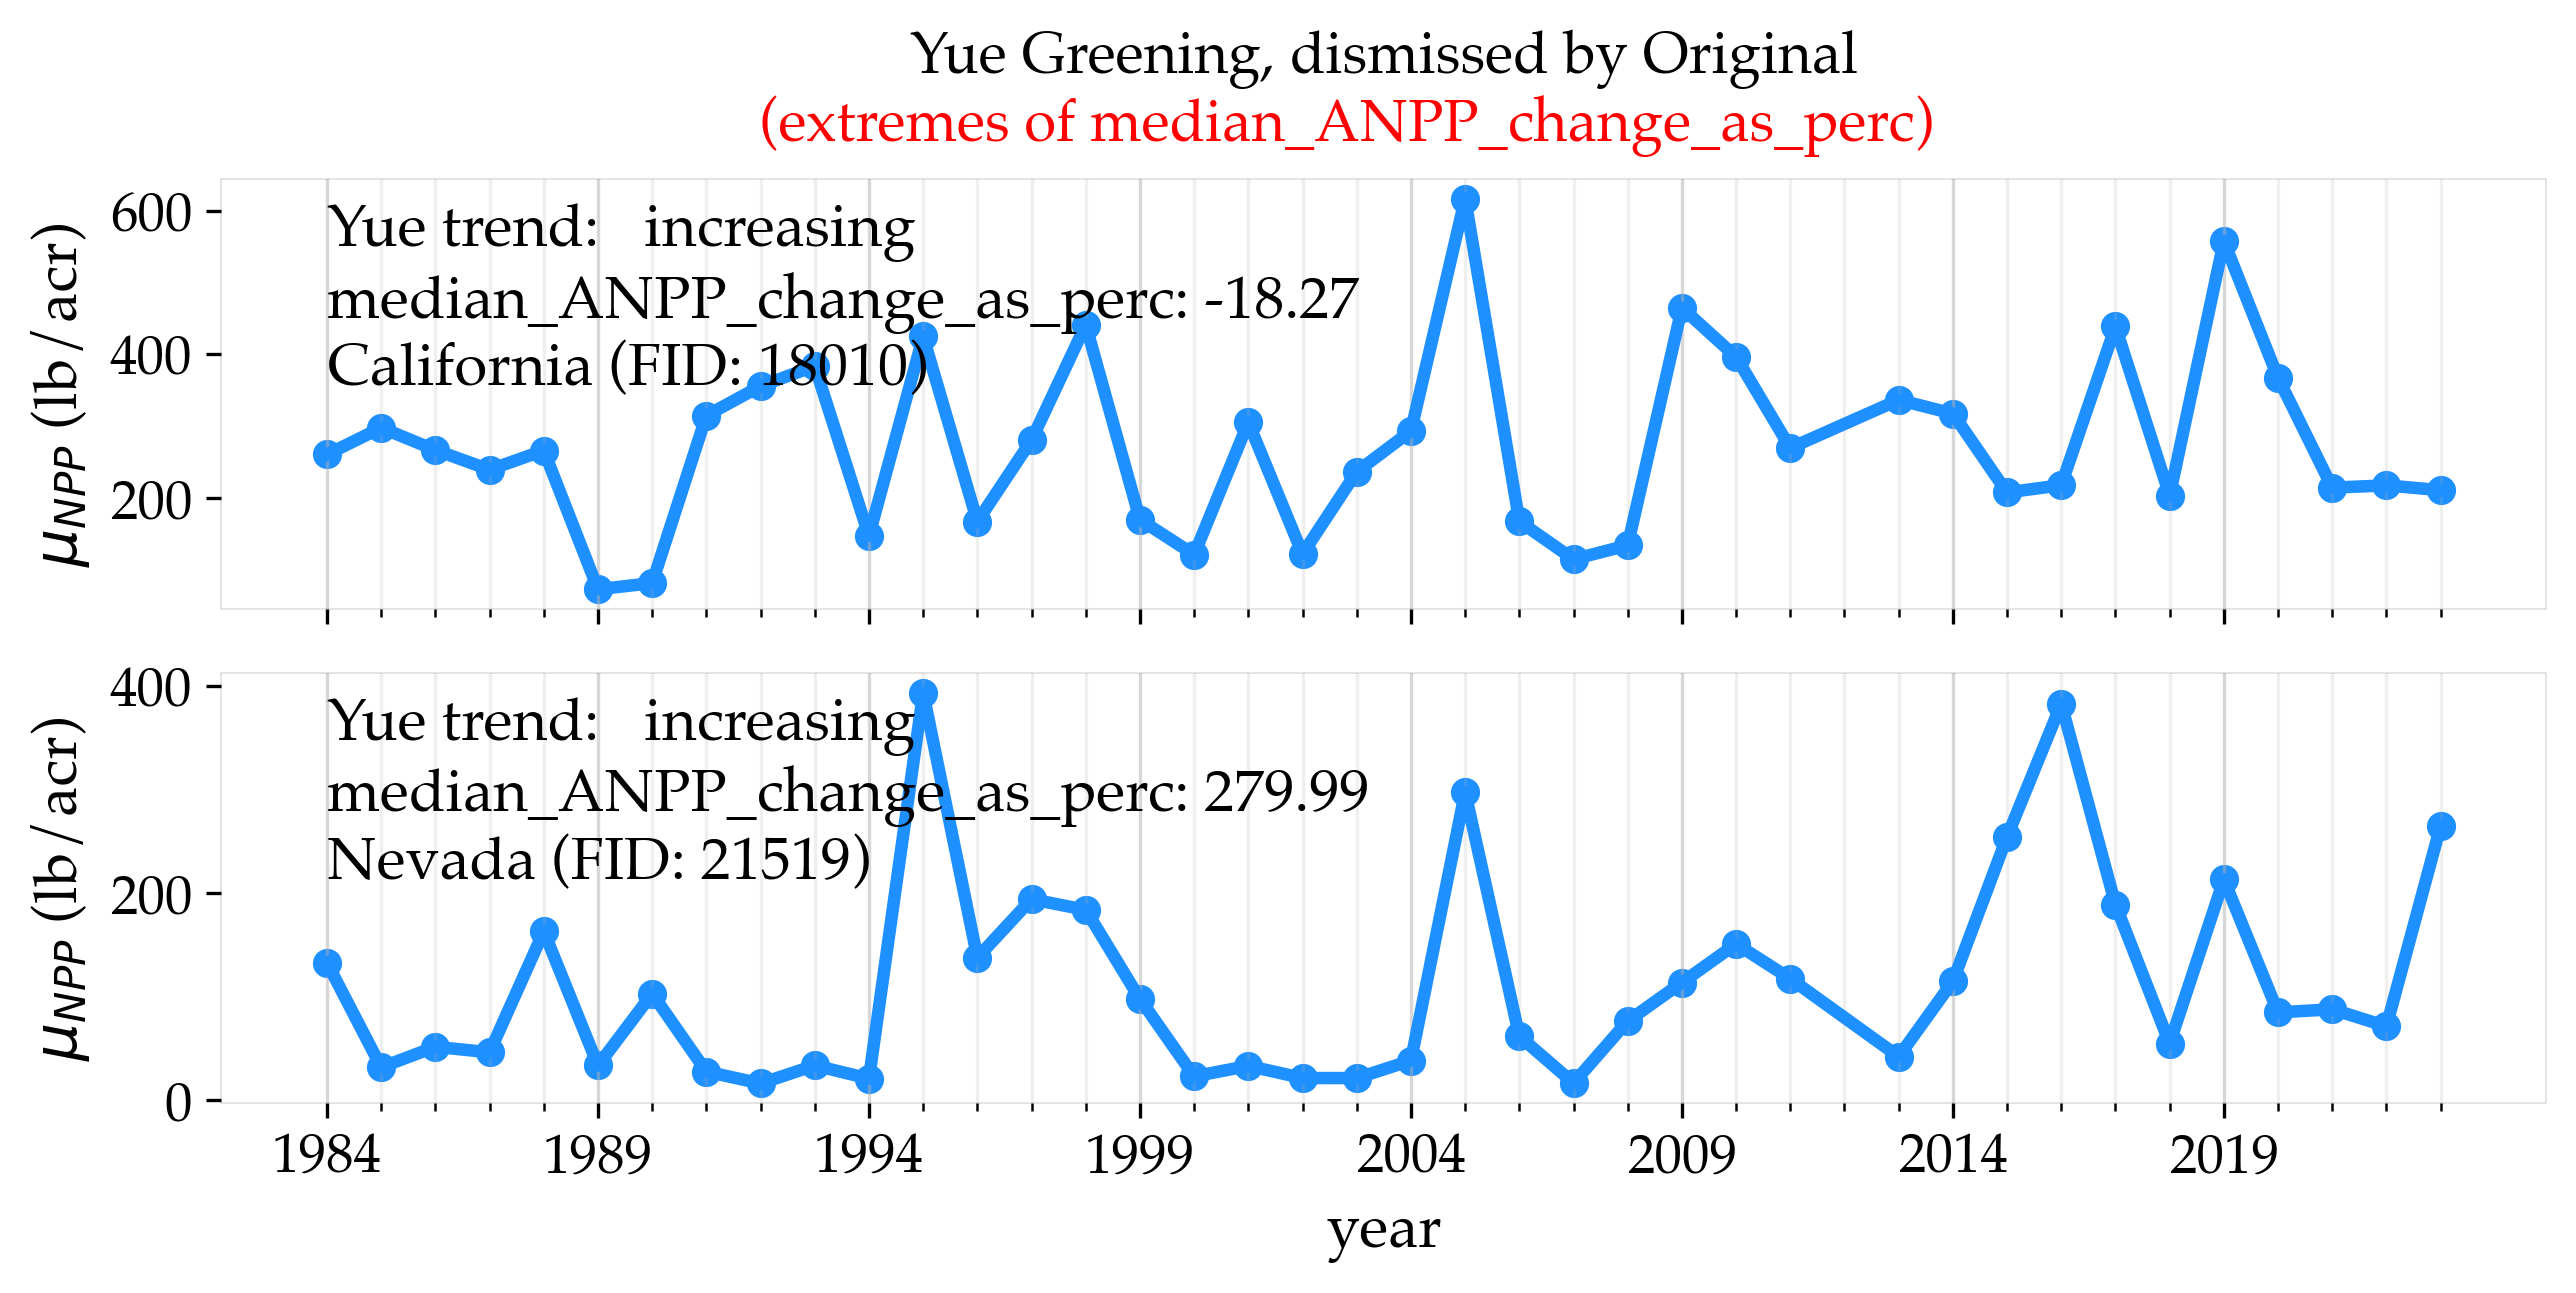

In [60]:
a_metric = "median_ANPP_change_as_perc"
min_idx = SF_west_Yue_notOrig[a_metric].idxmin()
max_idx = SF_west_Yue_notOrig[a_metric].idxmax()
fid_min = SF_west_Yue_notOrig.loc[min_idx, "fid"]
fid_max = SF_west_Yue_notOrig.loc[max_idx, "fid"]
########################################################################################
fig, axes = plt.subplots(2, 1, figsize=(10, 4), sharex=True, 
                         gridspec_kw={"hspace": 0.15, "wspace": 0.05}, dpi=dpi_)
(ax1, ax2) = axes

ax1.set_xticks(major_ticks)
ax1.set_xticks(minor_ticks, minor=True)
ax1.grid(which='minor', alpha=0.2, axis="x")
ax1.grid(which='major', alpha=0.5, axis="x")

ax2.set_xticks(major_ticks)
ax2.set_xticks(minor_ticks, minor=True)
ax2.grid(which='minor', alpha=0.2, axis="x")
ax2.grid(which='major', alpha=0.5, axis="x")
######
###### subplot 1
######
a_fid = fid_min
df = ANPP_west[ANPP_west["fid"] == a_fid]
trend_ = SF_west.loc[SF_west.fid == a_fid, "trend_yue"].values[0]
a_metric_val = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, a_metric].values[0], 2)
state_ = list(df['state_majority_area'].unique())[0]
ax1.plot(df.year, df[y_var], linewidth=3, color="dodgerblue");
ax1.scatter(df.year, df[y_var], color="dodgerblue");
# ax1.legend(loc='best')

text_ = ("Yue trend:   {}\n" + a_metric + ": {}\n{} (FID: {})").format(trend_, a_metric_val, state_, a_fid)

y_txt = df[y_var].max() * .99
ax1.text(1984, y_txt, text_, fontsize=tick_legend_FontSize*1.2, va="top");
######
###### subplot 2
######
a_fid = fid_max
df = ANPP_west[ANPP_west["fid"] == a_fid]
trend_ = SF_west.loc[SF_west.fid == a_fid, "trend_yue"].values[0]
a_metric_val = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, a_metric].values[0], 2)
state_ = list(df['state_majority_area'].unique())[0]
ax2.plot(df.year, df[y_var], linewidth=3, color="dodgerblue");
ax2.scatter(df.year, df[y_var], color="dodgerblue");

text_ = ("Yue trend:   {}\n" + a_metric + ": {}\n{} (FID: {})").format(trend_, a_metric_val, state_, a_fid)
y_txt = df[y_var].max() * .99
ax2.text(1984, y_txt, text_, fontsize=tick_legend_FontSize*1.2, va="top");

ax1.set_ylabel(r'$\mu_{NPP}$ (lb/acr)')
ax2.set_ylabel(r'$\mu_{NPP}$ (lb/acr)')
ax2.set_xlabel('year') #, fontsize=14

# plt.subplots_adjust(left=0.9, right=0.92, top=0.92, bottom=0.9)
ax1.set_title("Yue Greening, dismissed by Original", y=1.15, fontsize=14)
plt.suptitle("(extremes of " + a_metric + ")", fontsize=14, y=.95, color="red");
# plt.tight_layout();
# fig.subplots_adjust(top=0.8, bottom=0.08, left=0.082, right=0.981)
file_name = yue_plots + "greenYue_extreme" + a_metric +".pdf"
# plt.savefig(file_name, bbox_inches='tight', dpi=map_dpi_)
del(a_metric, min_idx, max_idx, fid_min, fid_max)

### Plot the FID with minimum Sen's slope

In [ ]:
a_metric = "sens_slope"
min_idx = SF_west_Yue_notOrig[a_metric].idxmin()
max_idx = SF_west_Yue_notOrig[a_metric].idxmax()
fid_min = SF_west_Yue_notOrig.loc[min_idx, "fid"]
fid_max = SF_west_Yue_notOrig.loc[max_idx, "fid"]
########################################################################################
fig, axes = plt.subplots(2, 1, figsize=(10, 4), sharex=True, 
                         gridspec_kw={"hspace": 0.15, "wspace": 0.05}, dpi=dpi_)
(ax1, ax2) = axes

ax1.set_xticks(major_ticks)
ax1.set_xticks(minor_ticks, minor=True)
ax1.grid(which='minor', alpha=0.2, axis="x")
ax1.grid(which='major', alpha=0.5, axis="x")

ax2.set_xticks(major_ticks)
ax2.set_xticks(minor_ticks, minor=True)
ax2.grid(which='minor', alpha=0.2, axis="x")
ax2.grid(which='major', alpha=0.5, axis="x")
######
###### subplot 1
######
a_fid = fid_min
df = ANPP_west[ANPP_west["fid"] == a_fid]
trend_ = SF_west.loc[SF_west.fid == a_fid, "trend_yue"].values[0]
a_metric_val = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, a_metric].values[0], 2)
slope_ = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, "sens_slope"].item(), 2)
Tau_ = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, "Tau"].item(), 2)
state_ = list(df['state_majority_area'].unique())[0]
ax1.plot(df.year, df[y_var], linewidth=3, color="dodgerblue");
ax1.scatter(df.year, df[y_var], color="dodgerblue");
# ax1.legend(loc='best')

text_ = ("Yue trend:   {}\nSen's slope: {}"  + "\nTau: {}" + "\n{} (FID: {})").format(trend_, slope_, Tau_,
                                                                                         state_, a_fid)
y_txt = df[y_var].max() * .99
ax1.text(1984, y_txt, text_, fontsize=tick_legend_FontSize*1.2, va="top");
######
###### subplot 2
######
a_fid = fid_max
df = ANPP_west[ANPP_west["fid"] == a_fid]
trend_ = SF_west.loc[SF_west.fid == a_fid, "trend_yue"].values[0]
a_metric_val = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, a_metric].values[0], 2)
slope_ = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, "sens_slope"].item(), 2)
Tau_ = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, "Tau"].item(), 2)

state_ = list(df['state_majority_area'].unique())[0]
ax2.plot(df.year, df[y_var], linewidth=3, color="dodgerblue");
ax2.scatter(df.year, df[y_var], color="dodgerblue");
# ax2.legend(loc='best')

text_ = ("Yue trend:   {}\nSen's slope: {}"  + "\nTau: {}" + "\n{} (FID: {})").format(trend_, slope_, Tau_,
                                                                                         state_, a_fid)
y_txt = df[y_var].max() * .99
ax2.text(1984, y_txt, text_, fontsize=tick_legend_FontSize*1.2, va="top");

ax1.set_ylabel(r'$\mu_{NPP}$ (lb/acr)')
ax2.set_ylabel(r'$\mu_{NPP}$ (lb/acr)')
ax2.set_xlabel('year') #, fontsize=14

# plt.subplots_adjust(left=0.9, right=0.92, top=0.92, bottom=0.9)
ax1.set_title("Yue Greening, dismissed by Original", y=1.18, fontsize="14")
plt.suptitle("(extremes of " + a_metric + ")", fontsize=15, y=.95, color="red");
# plt.tight_layout();
# fig.subplots_adjust(top=0.8, bottom=0.08, left=0.082, right=0.981)
file_name = yue_plots + "greenYue_extreme" + a_metric +".pdf"
plt.savefig(file_name, bbox_inches='tight', dpi=map_dpi_)
del(a_metric, min_idx, max_idx, fid_min, fid_max)

In [ ]:
SF_west_Yue_notOrig.columns

In [ ]:
a_metric = "Tau"
min_idx = SF_west_Yue_notOrig[a_metric].idxmin()
max_idx = SF_west_Yue_notOrig[a_metric].idxmax()
fid_min = SF_west_Yue_notOrig.loc[min_idx, "fid"]
fid_max = SF_west_Yue_notOrig.loc[max_idx, "fid"]
########################################################################################
fig, axes = plt.subplots(2, 1, figsize=(10, 4), sharex=True, 
                         gridspec_kw={"hspace": 0.15, "wspace": 0.05}, dpi=dpi_)
(ax1, ax2) = axes

ax1.set_xticks(major_ticks)
ax1.set_xticks(minor_ticks, minor=True)
ax1.grid(which='minor', alpha=0.2, axis="x")
ax1.grid(which='major', alpha=0.5, axis="x")

ax2.set_xticks(major_ticks)
ax2.set_xticks(minor_ticks, minor=True)
ax2.grid(which='minor', alpha=0.2, axis="x")
ax2.grid(which='major', alpha=0.5, axis="x")
######
###### subplot 1
######
a_fid = fid_min
df = ANPP_west[ANPP_west["fid"] == a_fid]
trend_ = SF_west.loc[SF_west.fid == a_fid, "trend_yue"].values[0]
a_metric_val = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, a_metric].values[0], 2)
slope_ = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, "sens_slope"].item(), 2)
Tau_ = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, "Tau"].item(), 2)

state_ = list(df['state_majority_area'].unique())[0]
ax1.plot(df.year, df[y_var], linewidth=3, color="dodgerblue");
ax1.scatter(df.year, df[y_var], color="dodgerblue");

text_ = ("Yue trend:   {}\nSen's slope: {}"  + "\nTau: {}" + "\n{} (FID: {})").format(trend_, slope_, Tau_,
                                                                                         state_, a_fid)
y_txt = df[y_var].max() * .99
ax1.text(1984, y_txt, text_, fontsize=tick_legend_FontSize*1.2, va="top");
######
###### subplot 2
######
a_fid = fid_max
df = ANPP_west[ANPP_west["fid"] == a_fid]
trend_ = SF_west.loc[SF_west.fid == a_fid, "trend_yue"].values[0]
a_metric_val = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, a_metric].values[0], 2)
slope_ = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, "sens_slope"].item(), 2)
Tau_ = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, "Tau"].item(), 2)

state_ = list(df['state_majority_area'].unique())[0]
ax2.plot(df.year, df[y_var], linewidth=3, color="dodgerblue");
ax2.scatter(df.year, df[y_var], color="dodgerblue");
# ax2.legend(loc='best')

text_ = ("Yue trend:   {}\nSen's slope: {}"  + "\nTau: {}" + "\n{} (FID: {})").format(trend_, slope_, Tau_,
                                                                                      state_, a_fid)
y_txt = df[y_var].max() * .99
ax2.text(1984, y_txt, text_, fontsize=tick_legend_FontSize*1.2, va="top");

ax1.set_ylabel(r'$\mu_{NPP}$ (lb/acr)')
ax2.set_ylabel(r'$\mu_{NPP}$ (lb/acr)')
ax2.set_xlabel('year') #, fontsize=14

# plt.subplots_adjust(left=0.9, right=0.92, top=0.92, bottom=0.9)
ax1.set_title("Yue Greening, dismissed by Original", fontsize=13, y=1.18)
plt.suptitle("(extremes of " + a_metric + ")", fontsize=15, y=.95, color='red');
# plt.tight_layout();
# fig.subplots_adjust(top=0.8, bottom=0.08, left=0.082, right=0.981)
file_name = yue_plots + "greenYue_extreme" + a_metric +".pdf"
# plt.savefig(file_name, bbox_inches='tight', dpi=map_dpi_)
del(a_metric, min_idx, max_idx, fid_min, fid_max)

In [ ]:
random.seed(3)
random_idx = random.sample(list(SF_west_Yue_notOrig.index), 2)
min_idx = random_idx[0]
max_idx = random_idx[1]
fid_min = SF_west_Yue_notOrig.loc[min_idx, "fid"]
fid_max = SF_west_Yue_notOrig.loc[max_idx, "fid"]

########################################################################################
fig, axes = plt.subplots(2, 1, figsize=(10, 4), sharex=True, 
                         gridspec_kw={"hspace": 0.02, "wspace": 0.05}, dpi=dpi_)
(ax1, ax2) = axes

ax1.set_xticks(major_ticks)
ax1.set_xticks(minor_ticks, minor=True)
ax1.grid(which='minor', alpha=0.2, axis="x")
ax1.grid(which='major', alpha=0.5, axis="x")

ax2.set_xticks(major_ticks)
ax2.set_xticks(minor_ticks, minor=True)
ax2.grid(which='minor', alpha=0.2, axis="x")
ax2.grid(which='major', alpha=0.5, axis="x")
######
###### subplot 1
######
a_fid = fid_min
df = ANPP_west[ANPP_west["fid"] == a_fid]
trend_ = SF_west.loc[SF_west.fid == a_fid, "trend_yue"].values[0]
slope_ = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, "sens_slope"].item(), 2)
Tau_ = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, "Tau"].item(), 2)

state_ = list(df['state_majority_area'].unique())[0]
ax1.plot(df.year, df[y_var], linewidth=3, color="dodgerblue");
ax1.scatter(df.year, df[y_var], color="dodgerblue");
# ax1.legend(loc='best')

text_ = ("Yue trend:   {}\nSen's slope: {}"  + "\nTau: {}" + "\n{} (FID: {})").format(trend_, slope_, Tau_,
                                                                                      state_, a_fid)
y_txt = df[y_var].max() * .99
ax1.text(1984, y_txt, text_, fontsize=tick_legend_FontSize*1.2, va="top");
ax1.xaxis.set_ticks_position('none')
######
###### subplot 2
######
a_fid = fid_max
df = ANPP_west[ANPP_west["fid"] == a_fid]
trend_ = SF_west.loc[SF_west.fid == a_fid, "trend_yue"].values[0]
state_ = list(df['state_majority_area'].unique())[0]
slope_ = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, "sens_slope"].item(), 2)
Tau_ = round(ANPP_MK_df.loc[ANPP_MK_df.fid == a_fid, "Tau"].item(), 2)

ax2.plot(df.year, df[y_var], linewidth=3, color="dodgerblue");
ax2.scatter(df.year, df[y_var], color="dodgerblue");

text_ = ("Yue trend:   {}\nSen's slope: {}"  + "\nTau: {}" + "\n{} (FID: {})").format(trend_, slope_, Tau_,
                                                                                         state_, a_fid)
y_txt = df[y_var].max() * .99
ax2.text(1984, y_txt, text_, fontsize=tick_legend_FontSize*1.2, va="top");

ax1.set_ylabel(r'$\mu_{NPP}$ (lb/acr)')
ax2.set_ylabel(r'$\mu_{NPP}$ (lb/acr)')
ax2.set_xlabel('year') #, fontsize=14

# plt.subplots_adjust(left=0.9, right=0.92, top=0.92, bottom=0.9)
#ax1.set_title("Yue Greening, dismissed by Original", fontsize=13, y=1.18)
plt.suptitle("random FIDs. Green by Yue. Dismissed by original", fontsize=13, y=.95);
# plt.tight_layout();
# fig.subplots_adjust(top=0.8, bottom=0.08, left=0.082, right=0.981)
file_name = yue_plots + "greenYue_ random.pdf"
plt.savefig(file_name, bbox_inches='tight', dpi=map_dpi_)

In [ ]:
# drop trend so there is no bug later
print (ANPP_MK_df.shape)
# ANPP_MK_df.drop(columns=["trend"], inplace=True)
print (ANPP_MK_df.shape)

In [ ]:
ANPP_MK_df.columns

In [ ]:
np.sort(ANPP_MK_df["sens_slope"])[:10]

In [ ]:
np.sort(ANPP_MK_df["sens_slope"])[-20:]

In [ ]:
np.sort(ANPP_MK_df.loc[ANPP_MK_df["trend_yue"] == "increasing", "sens_slope"])[:10]

In [ ]:
np.sort(ANPP_MK_df.loc[ANPP_MK_df["trend_yue"] == "increasing", "sens_slope"])[-10:]

### Plot everything and color based on slope

In [ ]:
tick_legend_FontSize = 15
params = {"font.family": "Palatino",
          "legend.fontsize": tick_legend_FontSize * 1,
          "axes.labelsize": tick_legend_FontSize * 1.2,
          "axes.titlesize": tick_legend_FontSize * 1.2,
          "xtick.labelsize": tick_legend_FontSize * 1.1,
          "ytick.labelsize": tick_legend_FontSize * 1.1,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "ytick.left": True,
          "xtick.labelbottom": True,
          "ytick.labelleft": True}

plt.rcParams.update(params)

In [ ]:
SF_west.head(2)

In order to have the center at ```yellow``` we manipulated ```vmin``` and ```vmax```.
Another way is [TwoSlopeNorm](https://matplotlib.org/stable/users/explain/colors/colormapnorms.html). Not pretty.

Or from AI?
```norm = colors.MidpointNormalize(midpoint=midpoint, vmin=data.min(), vmax=data.max())```?

### Plot increasing trends and color based on slope

The labels seem tobe based on p-values. increasing means **```p-value < 0.05```**.

In [ ]:
print (ANPP_MK_df[ANPP_MK_df["trend_yue"] == "increasing"]["p"].max())
print (ANPP_MK_df[ANPP_MK_df["trend_yue"] == "increasing"]["p"].min())

In [ ]:
SF_west.columns

In [ ]:
# Update Dec. 3, 2024. Add Yue's new locations to this plot
SF_west_increase = SF_west[SF_west["trend_yue"] == "increasing"]
SF_west_increase.shape

### Plot positive Spearman's with p-value smaller than 0.05

In [ ]:
print (SF_west["Spearman"].min())
SF_west.head(2)

In [ ]:
SF_west_spearmanP5 = SF_west[(SF_west["Spearman"] > 0) & (SF_west["p_Spearman"] < 0.05)]

## Side by side

In [ ]:
tick_legend_FontSize = 15
params = {"font.family": "Palatino",
          "legend.fontsize": tick_legend_FontSize * 1,
          "axes.labelsize": tick_legend_FontSize * 1.2,
          "axes.titlesize": tick_legend_FontSize * 1.2,
          "xtick.labelsize": tick_legend_FontSize * 1.1,
          "ytick.labelsize": tick_legend_FontSize * 1.1,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "ytick.left": True,
          "xtick.labelbottom": True,
          "ytick.labelleft": True}

plt.rcParams.update(params)

# Investigate large change in median diff

In [ ]:
SF_west_median_diff_increase.head(2)

In [ ]:
max_loc = SF_west_median_diff_increase["median_ANPP_change_as_perc"].idxmax()
SF_west_median_diff_increase.loc[max_loc]

In [ ]:
max_percChange_median_fid = SF_west_median_diff_increase.loc[max_loc]["fid"]

In [ ]:
tick_legend_FontSize = 15
params = {"font.family": "Palatino",
          "legend.fontsize": tick_legend_FontSize * 1,
          "axes.labelsize": tick_legend_FontSize * 1.2,
          "axes.titlesize": tick_legend_FontSize * 1.2,
          "xtick.labelsize": tick_legend_FontSize * 1.1,
          "ytick.labelsize": tick_legend_FontSize * 1.1,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "ytick.left": True,
          "xtick.labelbottom": True,
          "ytick.labelleft": True}

plt.rcParams.update(params)

# Same plot as above. Just pick the ones with low p-value

In [ ]:
NPP_TS = pd.read_csv(rangeland_bio_base + ".csv.csv")
NPP_TS.head(2)

In [ ]:
NPP_TS_21519 = NPP_TS[NPP_TS.FID==21519].copy()